In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [15]:
data_path = "/Users/surajmathapati/Prep/Fraud Detection/data/raw_data/creditcard_2023.csv"
data = pd.read_csv(data_path)

In [16]:
drop_col = ['id']
data = data.drop(drop_col, axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [18]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,1.991314e-16,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [19]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
data.duplicated().sum()

np.int64(1)

In [21]:
#Examining the distribution of the target variable

print(data['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


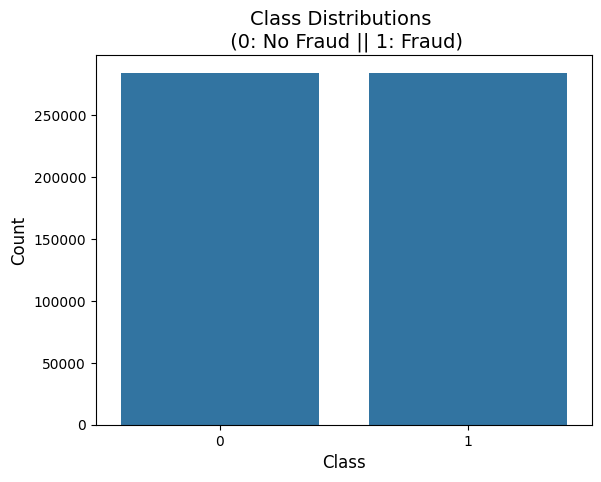

In [22]:
sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

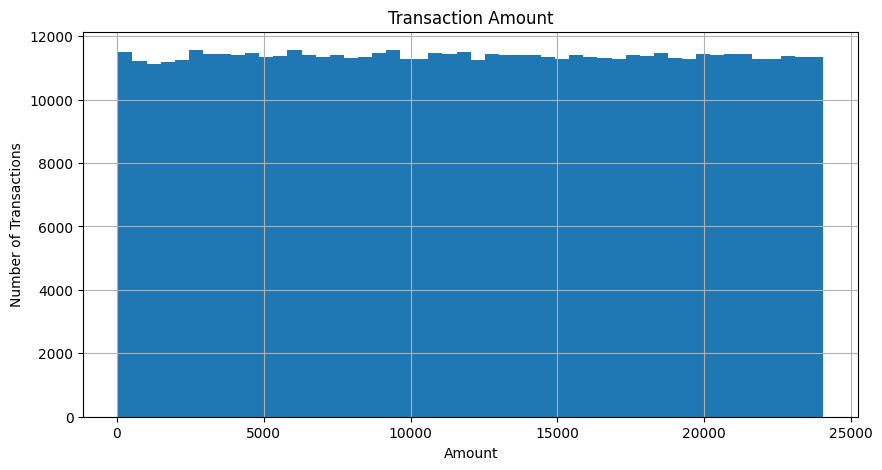

In [23]:
#Plotting histograms to see their distributions:

data["Amount"].hist(bins=50, figsize=(10, 5))
plt.title("Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Number of Transactions")
plt.show()

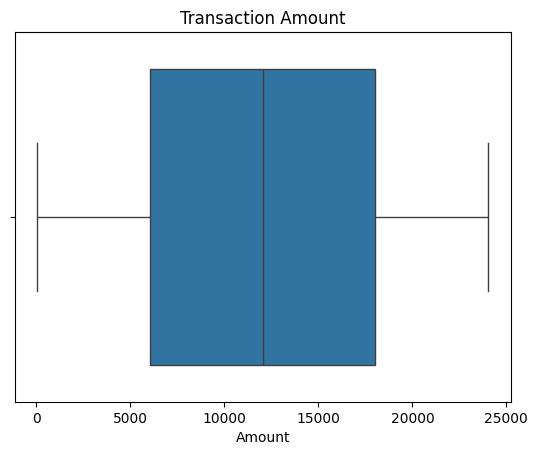

In [24]:
sns.boxplot(x = "Amount", data = data)
plt.title("Transaction Amount")
plt.show()

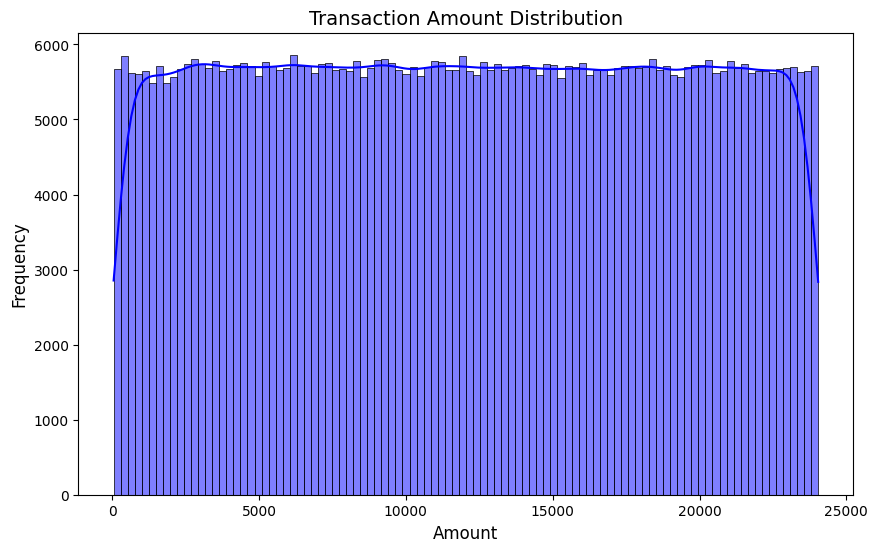

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=100, color='blue', kde=True)
plt.title('Transaction Amount Distribution', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

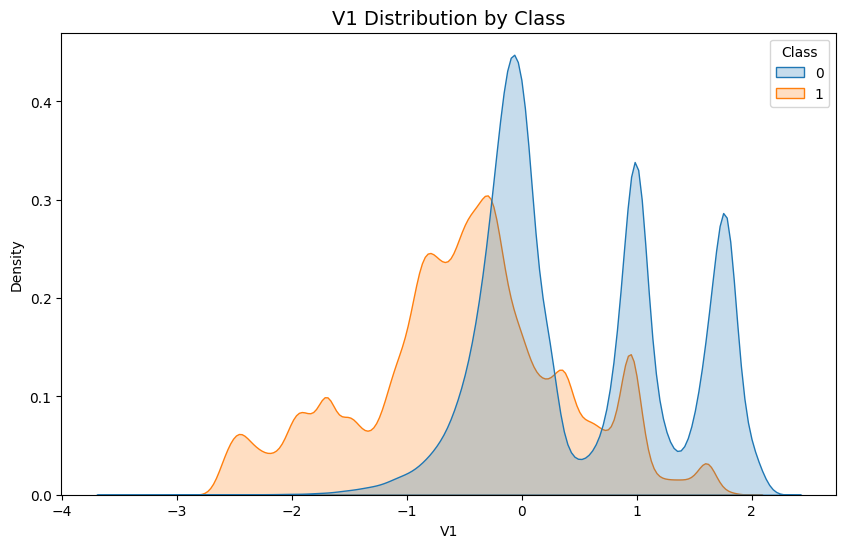

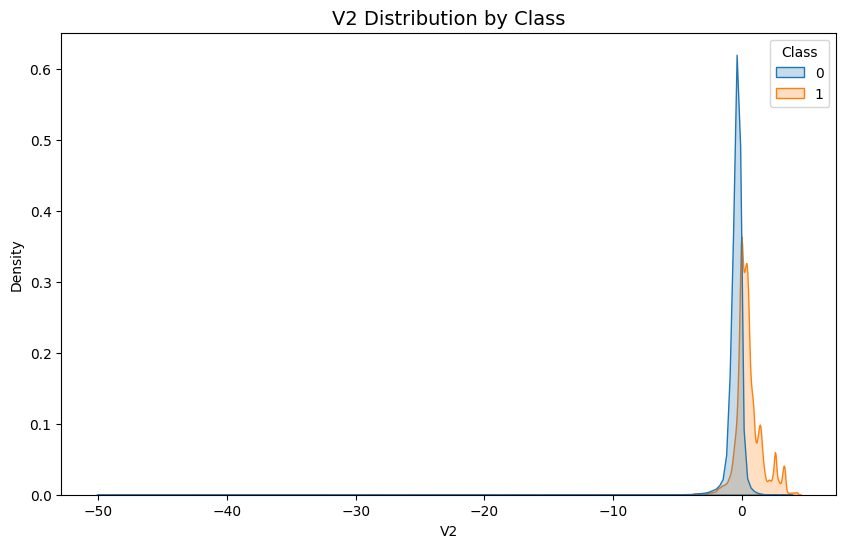

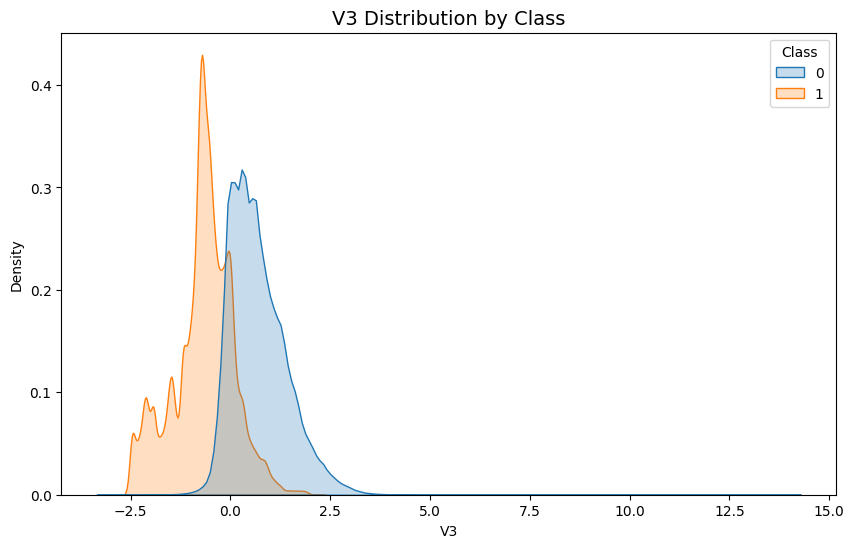

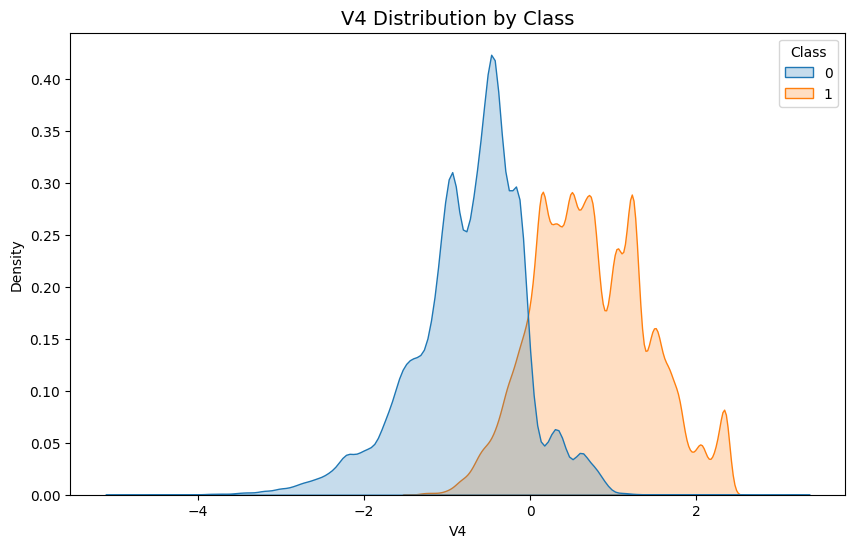

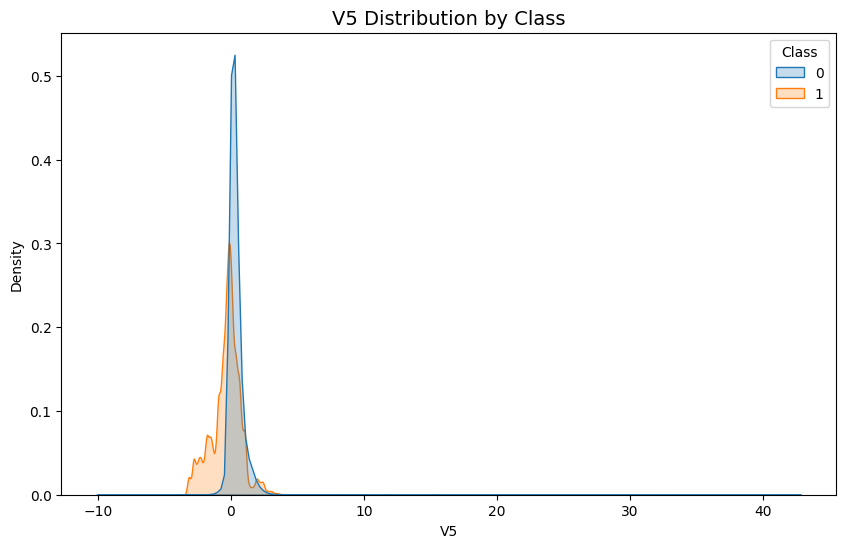

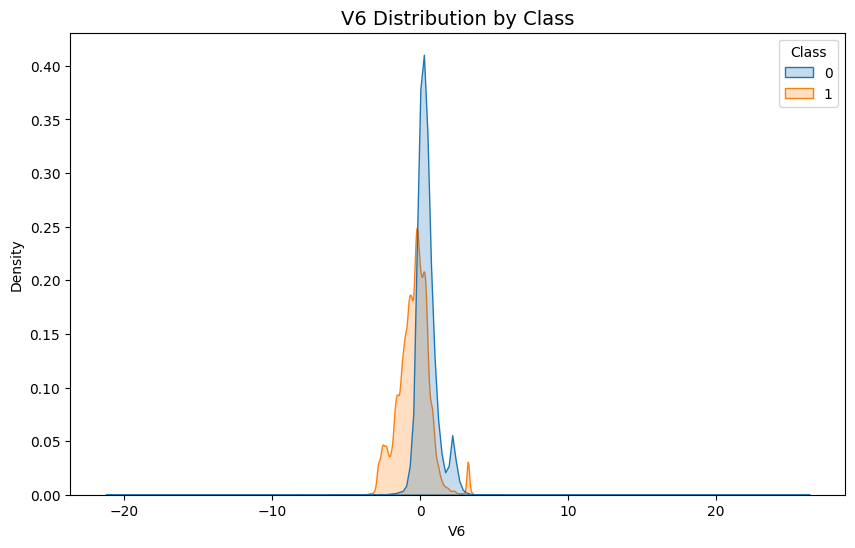

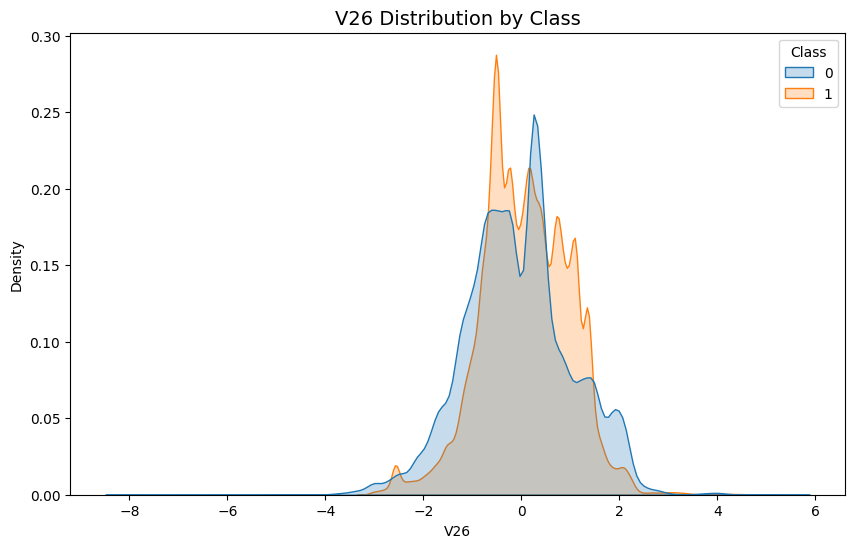

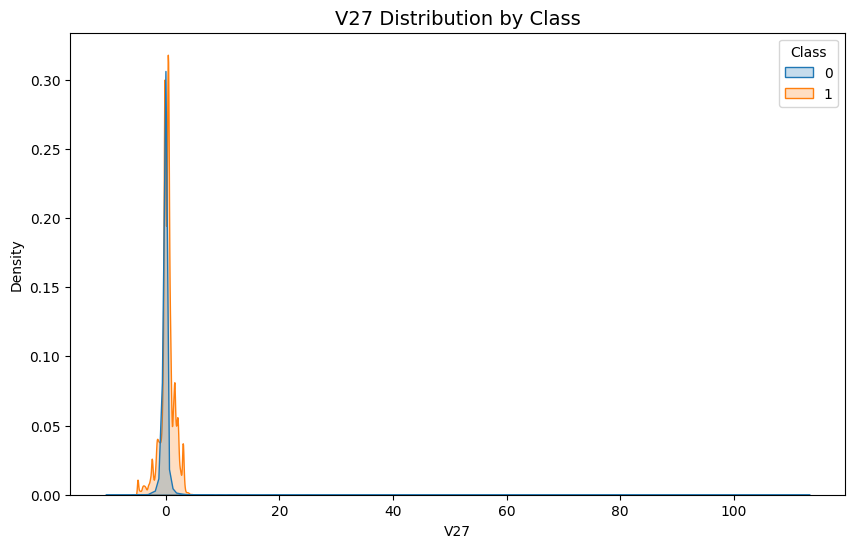

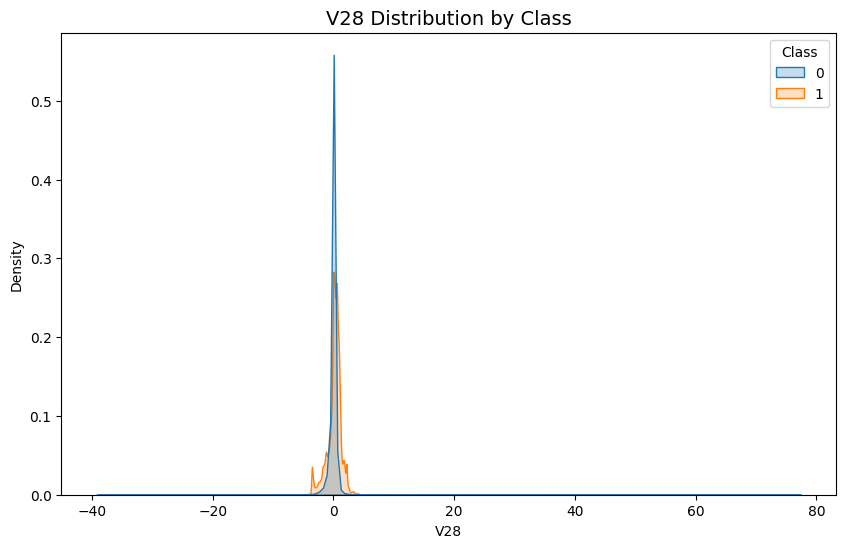

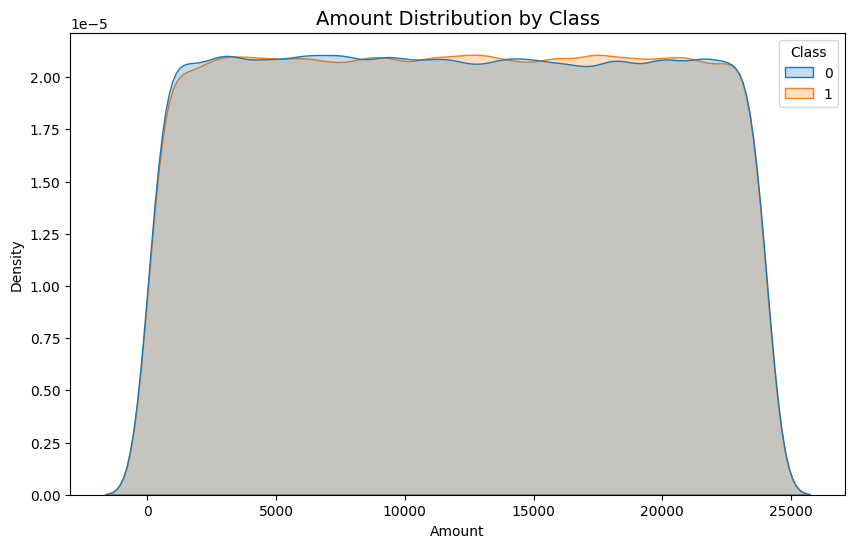

In [30]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6','V26', 'V27', 'V28', 'Amount']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data = data, x = feature, hue = "Class", fill = True)
    plt.title(f'{feature} Distribution by Class', fontsize=14)
    plt.show()

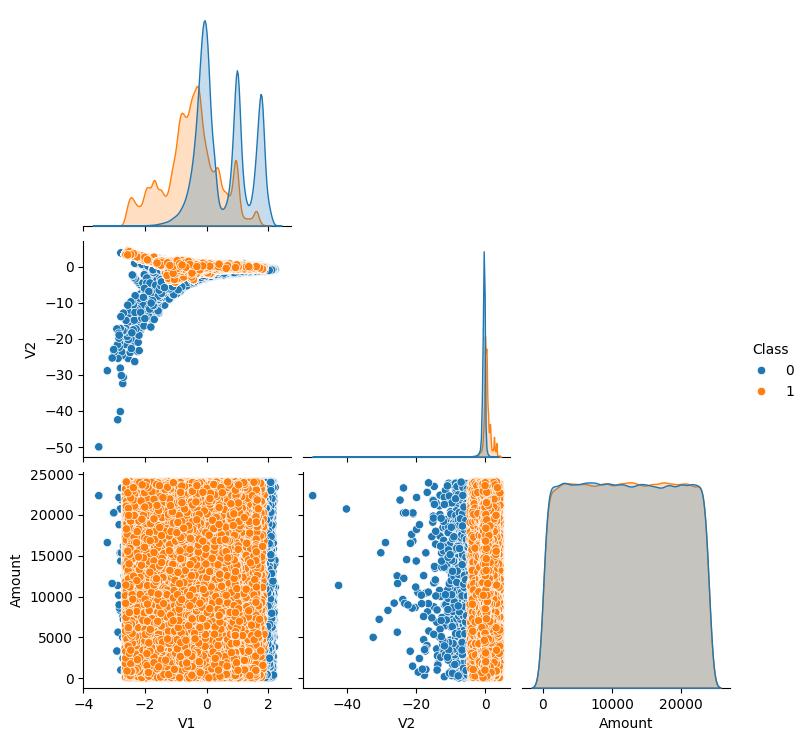

In [31]:
sample_features = ["V1", "V2", "Amount", "Class"]
sns.pairplot(data[sample_features], hue="Class", corner=True)
plt.show()

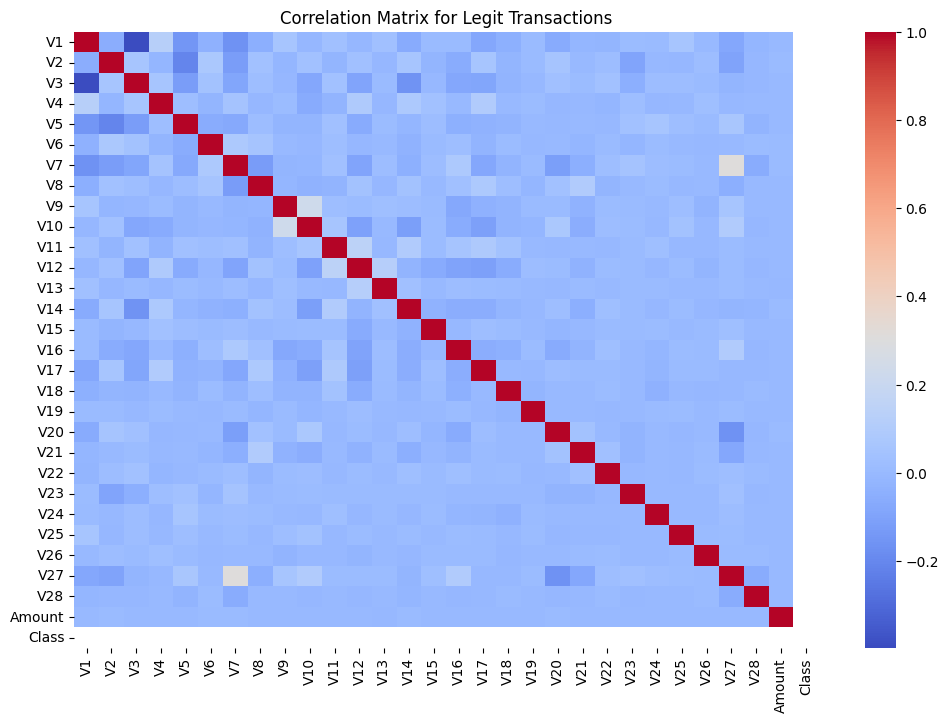

In [32]:
data_legit = data[data["Class"] == 0]
data_fraud = data[data["Class"] == 1]

plt.figure(figsize=(12, 8))
sns.heatmap(data_legit.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix for Legit Transactions")
plt.show()

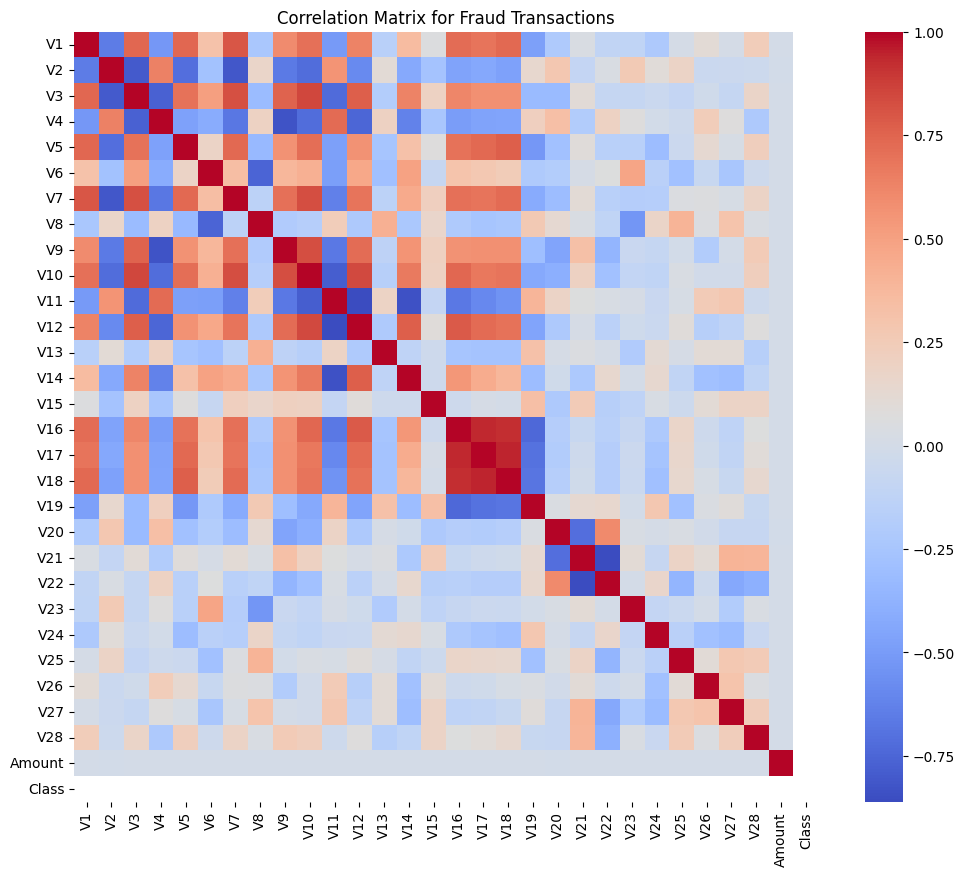

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_fraud.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix for Fraud Transactions")
plt.show()

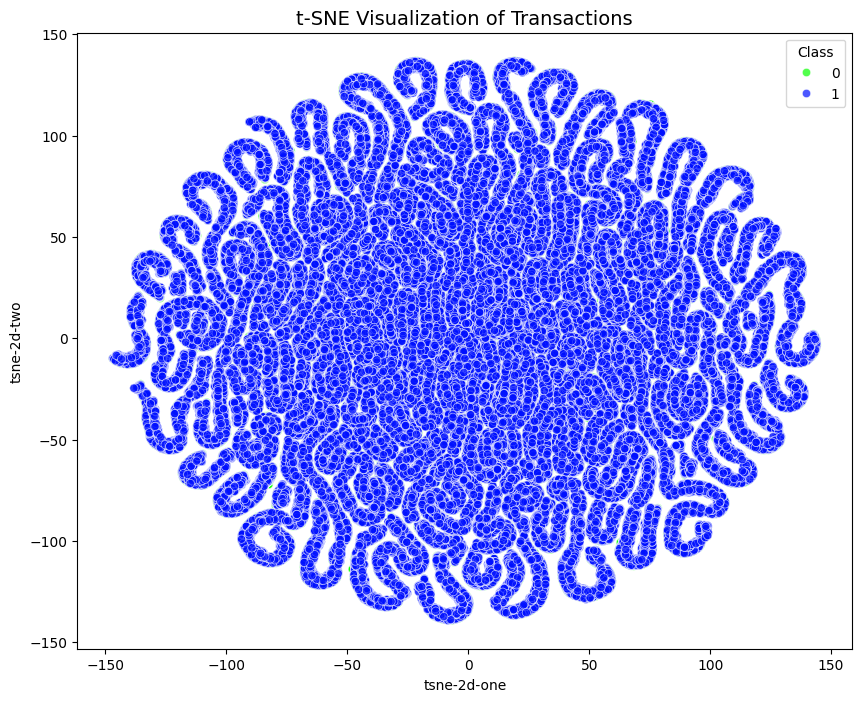

In [37]:
TSNE_features = data.drop("Class", axis=1)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(TSNE_features)
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hsv", 2),
    data=data,
    legend="full",
    alpha=0.7
)

plt.title('t-SNE Visualization of Transactions', fontsize=14)
plt.show()

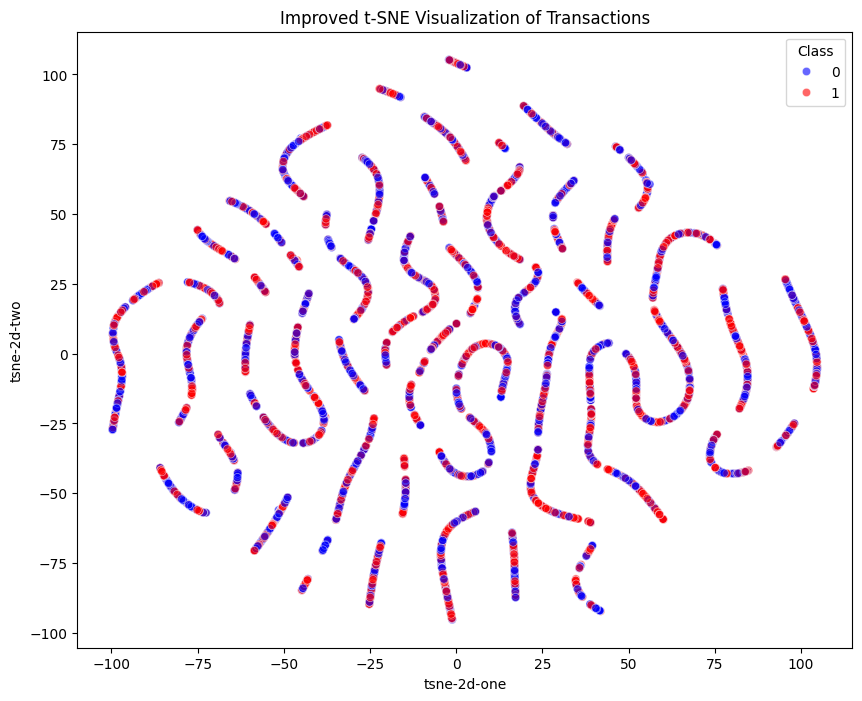

In [39]:
#import umap

legit_sample = data[data["Class"] == 0].sample(5000, random_state=42)
fraud_sample = data[data["Class"] == 1].sample(5000, random_state=42)

data_sample_balanced = pd.concat([legit_sample, fraud_sample]).sample(frac=1, random_state=42)

X = data_sample_balanced.drop("Class", axis=1)
y = data_sample_balanced["Class"]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(X)

data_sample_balanced['tsne-2d-one'] = tsne_results[:,0]
data_sample_balanced['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y,
    palette={0: 'blue', 1: 'red'},
    data=data_sample_balanced,
    alpha=0.6
)
plt.title("Improved t-SNE Visualization of Transactions")
plt.show()


/var/folders/l4/0cg12qp967z3qm08drf_6tmc0000gn/T/ipykernel_20281/1790116578.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_freq = data.groupby(['Amount_Bin', 'Class']).size().reset_index(name='counts')


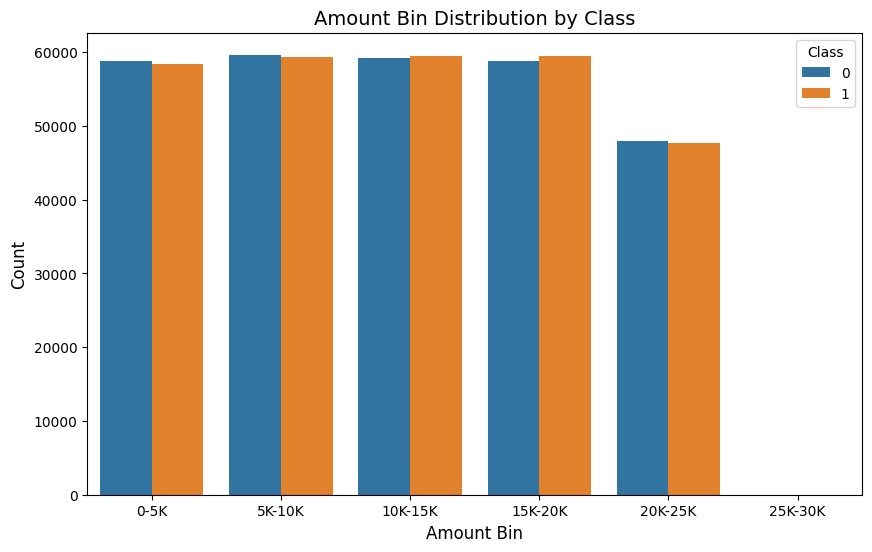

In [45]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K']
data['Amount_Bin'] = pd.cut(data['Amount'], bins=bins, labels=labels)
amount_freq = data.groupby(['Amount_Bin', 'Class']).size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount_Bin', y='counts', hue='Class', data=amount_freq)
plt.title('Amount Bin Distribution by Class', fontsize=14)
plt.xlabel('Amount Bin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()